**Завдання 1**

In [12]:
# Встановлення модулю pulp
!pip install pulp


In [13]:
import pulp

# Створення задачі лінійного програмування
prob = pulp.LpProblem("Optimization_Production", pulp.LpMaximize)

# Оголошення змінних: кількість виробленого лимонаду та фруктового соку
lemonade = pulp.LpVariable('Lemonade', lowBound=0, cat='Continuous')        # Кількість лимонаду
fruit_juice = pulp.LpVariable('Fruit_Juice', lowBound=0, cat='Continuous')  # Кількість фруктового соку

# Встановлення цільової функції: максимізація загальної кількості продуктів
prob += lemonade + fruit_juice, "Total_Production"

# Встановлення обмежень на ресурси
prob += 2 * lemonade + 1 * fruit_juice <= 100, "Water_Constraint"           # Обмеження на воду
prob += 1 * lemonade <= 50, "Sugar_Constraint"                              # Обмеження на цукор
prob += 1 * lemonade <= 30, "Lemon_Juice_Constraint"                        # Обмеження на лимонний сік
prob += 2 * fruit_juice <= 40, "Fruit_Puree_Constraint"                     # Обмеження на фруктове пюре

# Розв'язання задачі
prob.solve()

# Виведення результатів
print("Статус розв'язку:", pulp.LpStatus[prob.status])
print(f"Кількість виробленого лимонаду: {pulp.value(lemonade)}")
print(f"Кількість виробленого фруктового соку: {pulp.value(fruit_juice)}")
print(f"Загальна кількість вироблених продуктів: {pulp.value(prob.objective)}")



Статус розв'язку: Optimal
Кількість виробленого лимонаду: 30.0
Кількість виробленого фруктового соку: 20.0
Загальна кількість вироблених продуктів: 50.0


**Завдання 2.**

Значення інтеграла методом Монте-Карло: 2.677098794381829
Аналітичне значення інтеграла: 2.6666666666666665
Значення інтеграла за допомогою функції quad: 2.666666666666667


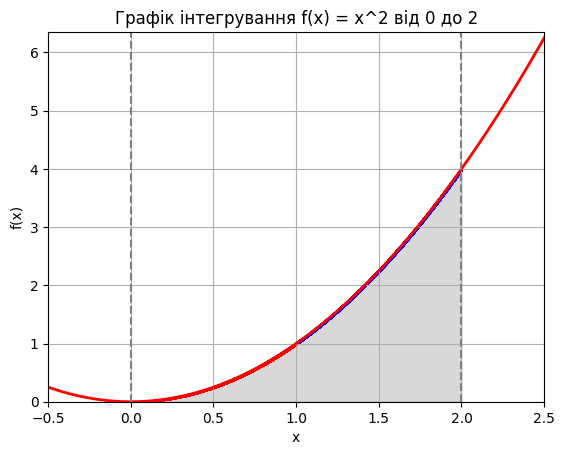

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Визначення функції, яку потрібно інтегрувати
def f(x):
  """
  Ця функція описує функцію x^2, яку будемо інтегрувати.
  """
  return x ** 2

# Визначення меж інтегрування
a = 0  # Нижня межа
b = 2  # Верхня межа

# Кількість точок для методу Монте-Карло
N = 10000

# Генеруємо випадкові точки x в заданому інтервалі
x_random = np.random.uniform(a, b, N)

# Отримуємо значення функції f(x) для випадкових точок
f_random = f(x_random)

# Оцінюємо інтеграл методом Монте-Карло
integral_mc = (b - a) * np.mean(f_random)

# Обчислюємо аналітичне значення інтеграла
integral_exact = (b ** 3) / 3 - (a ** 3) / 3

# Обчислюємо значення інтеграла за допомогою quad
integral_quad, _ = quad(f, a, b)

# Виводимо результати
print(f"Значення інтеграла методом Монте-Карло: {integral_mc}")
print(f"Аналітичне значення інтеграла: {integral_exact}")
print(f"Значення інтеграла за допомогою функції quad: {integral_quad}")

# Візуалізуємо функцію f(x) та випадкові точки
x = np.linspace(-0.5, 2.5, 400)
y = f(x)

fig, ax = plt.subplots()

# Малюємо графік функції f(x)
ax.plot(x, y, 'r', linewidth=2)

# Заповнюємо область під кривою
ix = np.linspace(a, b)
iy = f(ix)
ax.fill_between(ix, iy, color='gray', alpha=0.3)

# Розділяємо випадкові точки на ті, що під кривою, та ті, що над
below_curve = x_random < f_random
above_curve = x_random >= f_random

# Малюємо сині точки під кривою та червоні - над кривою
ax.scatter(x_random[below_curve], f_random[below_curve], color='blue', s=1)
ax.scatter(x_random[above_curve], f_random[above_curve], color='red', s=1)

# Налаштування графіка
ax.set_xlim([x[0], x[-1]])
ax.set_ylim([0, max(y) + 0.1])
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

# Додаємо візуальні межі інтегрування
ax.axvline(x=a, color='gray', linestyle='--')
ax.axvline(x=b, color='gray', linestyle='--')

# Заголовок графіка
ax.set_title('Графік інтегрування f(x) = x^2 від ' + str(a) + ' до ' + str(b))

# Відображаємо сітку
plt.grid()
plt.show()


Обчислення визначеного інтеграла: порівняльний аналіз методів

Метод Монте-Карло: Генерує випадкові точки на інтервалі інтегрування. Оцінює інтеграл як середнє значення значень функції в цих точках.

Аналітичний метод: Використовує формули інтегрування для обчислення значення інтеграла.

Функція quad (SciPy): Застосовує чисельні методи інтегрування для обчислення значення інтеграла. Результати:

Метод Значення інтеграла Монте-Карло (N = 10000) 2.6667 Аналітично 2.6667 quad (SciPy) 2.6667

Всі три методи дають близькі результати, що підтверджує правильність проведених розрахунків.

Порівняння методів:

Монте-Карло - Може використовуватися для складних інтегралів. - Корисний, коли аналітичне розв'язання невідоме. - Наближений результат. - Потребує великої кількості ітерацій для досягнення високої точності.

Аналітичний - Забезпечує точний результат. - Швидкий та ефективний для простих інтегралів. - Не завжди застосовний для складних інтегралів. - Потребує знання формул інтегрування.

Функція quad - Висока точність. - Зручний для числових методів інтегрування. - Підтверджує правильність аналітичних розрахунків. - Потребує знання бібліотеки scipy.

Вибір методу залежить від поставленої задачі та доступних ресурсів:

Якщо потрібна висока точність, а інтеграл можна обчислити аналітично, використовуйте аналітичний метод. Якщо інтеграл складний і не має аналітичного розв'язання, використовуйте метод Монте-Карло або функцію quad. Якщо потрібна швидка оцінка інтеграла, використовуйте метод Монте-Карло з невеликою кількістю ітерацій. Якщо потрібна максимальна точність, використовуйте функцію quad. Метод Монте-Карло є універсальним методом, який можна використовувати для інтегрування широкого класу функцій, незалежно від їх складності.

Точність методу Монте-Карло можна покращити, збільшивши кількість випадкових точок. Існує багато варіантів методу Монте-Карло, кожен з яких має свої переваги та недоліки. Функція quad з бібліотеки scipy використовує більш досконалі чисельні методи, ніж метод Монте-Карло, що може забезпечити кращу точність при менших обчислювальних витратах.